In [46]:
import os
REPO_PATH = os.getcwd().split('notebooks')[0]

import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import MolFromSmiles, Draw
import random
from lets_plot import *
LetsPlot.setup_html()
import seaborn as sns
from PIL import Image


In [132]:
# set the property you want to investigate (must match a column name of your data)
PROPERTY = 'mol_weight'

In [36]:
# load the generated data
data = pd.read_csv(REPO_PATH + 'outputs/guidance_150_50.csv')

In [37]:
# create a set of colours for plotting
colors = ['#FF0000', '#FFA500', '#0000FF', '#008000']
# for i in range(cmap.N):
#     rgba = cmap(i)
#     # rgb2hex accepts rgb or rgba
#     colors.append(matplotlib.colors.rgb2hex(rgba))
# colors = colors[2:-2]

In [38]:
from tdc import Oracle

oracle = Oracle("DRD2")

data['oracle_score'] = data['smiles'].apply(oracle)

Found local copy...


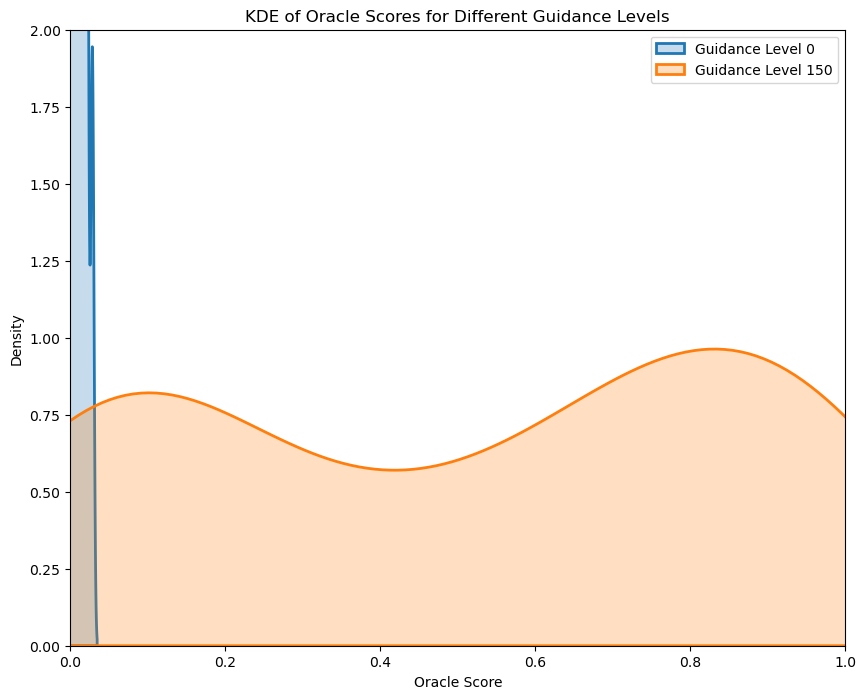

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

from rdkit.Chem import Draw
from IPython.display import display

# plots = []
# guidance_levels = data['guidance'].unique()

# for idx, level in enumerate(guidance_levels):
#         subset = data[data['guidance'] == level]
#         g = ggplot(subset, aes(x="oracle_score")) + \
#                 geom_density(aes(group='guidance', color='guidance', fill='guidance'), alpha=0.3) + \
#                 ggtitle(f'Oracle Score for Guidance Level {level}') + \
#                 xlab('Oracle Score') + \
#                 theme(legend_position='none')
#         plots.append(g)

# # Display the plots
# for plot in plots:
#         display(plot)


# Create a KDE plot for the 'oracle_score' column with increased dpi
guidance_levels_to_plot = [0, 150]

plt.figure(figsize=(10, 8), dpi=100)
plt.xlim(0, None)
plt.ylim(None, 2)

for level in guidance_levels_to_plot:
        subset = data[data['guidance'] == level]
        sns.kdeplot(subset["oracle_score"], bw_adjust=1, fill=True, linewidth=2, label=f"Guidance Level {level}")

plt.title("KDE of Oracle Scores for Different Guidance Levels")
plt.xlabel("Oracle Score")
plt.ylabel("Density")
plt.legend()
plt.show()

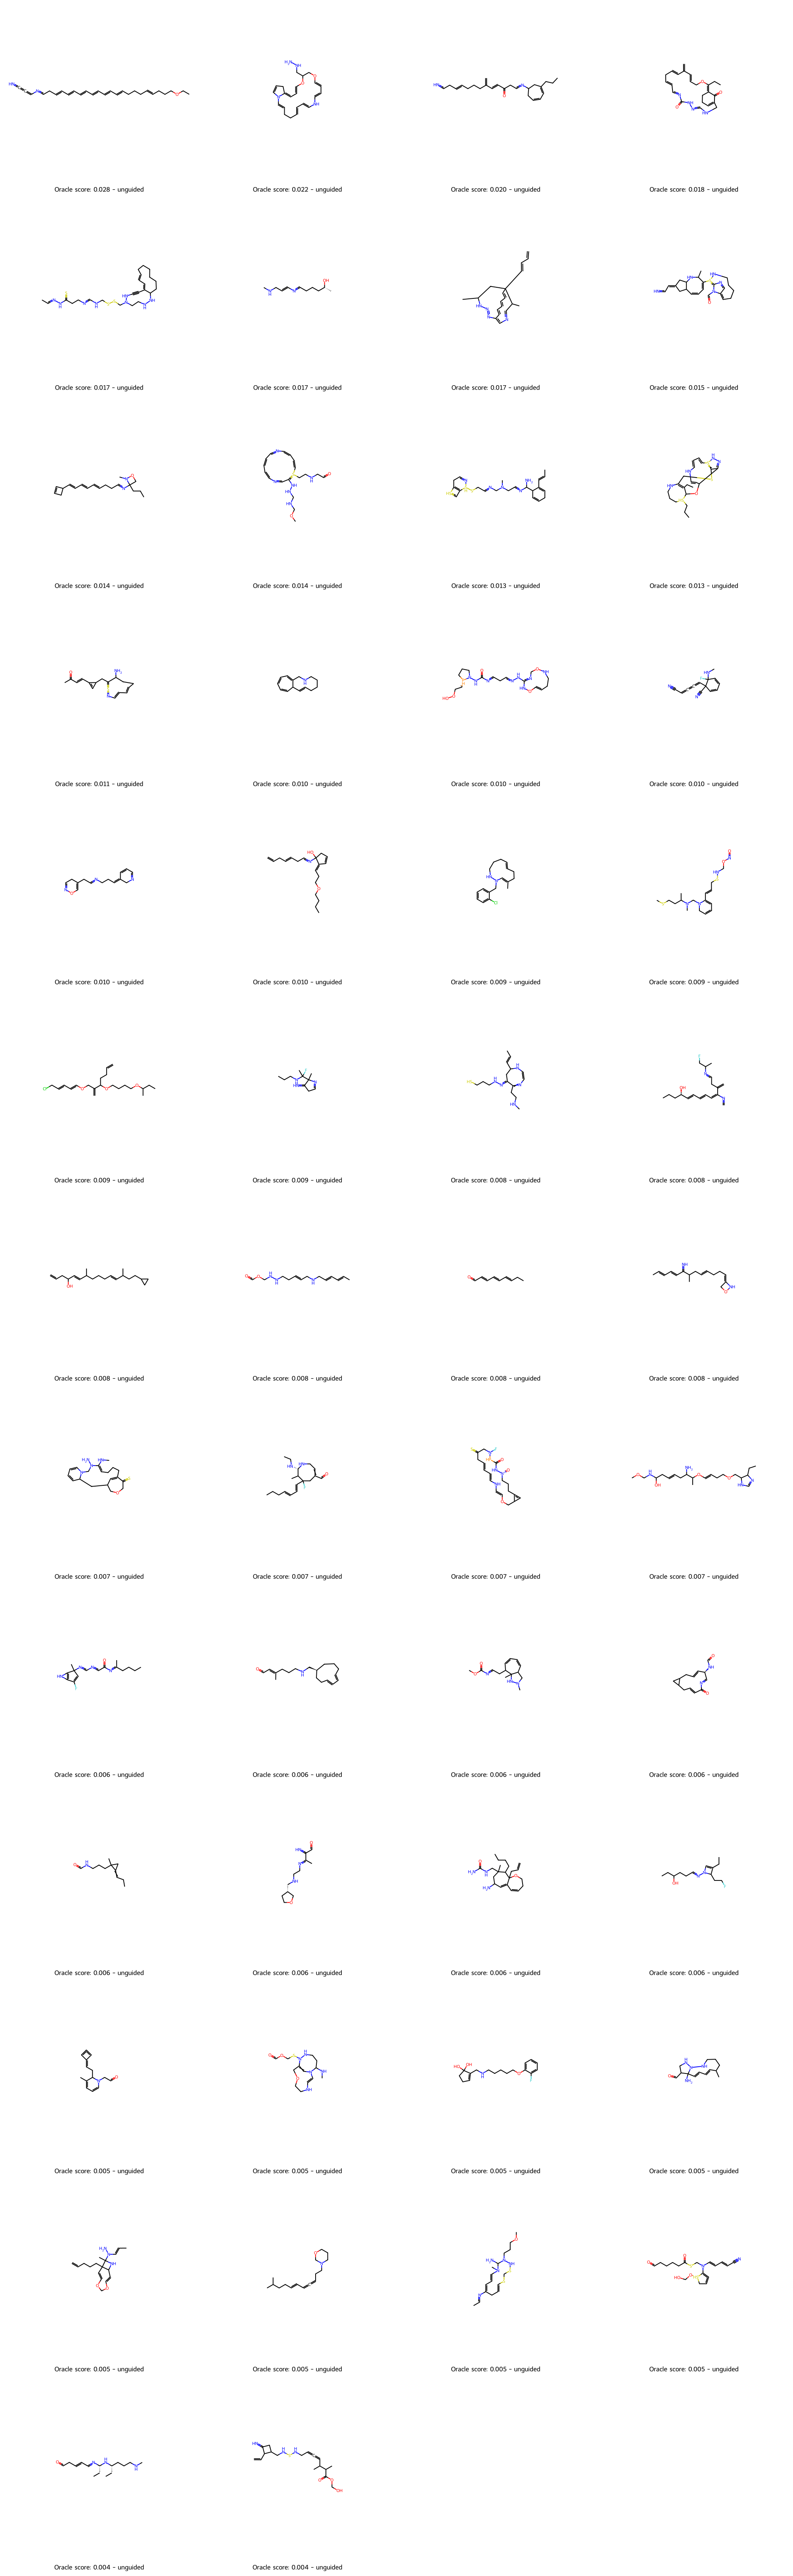

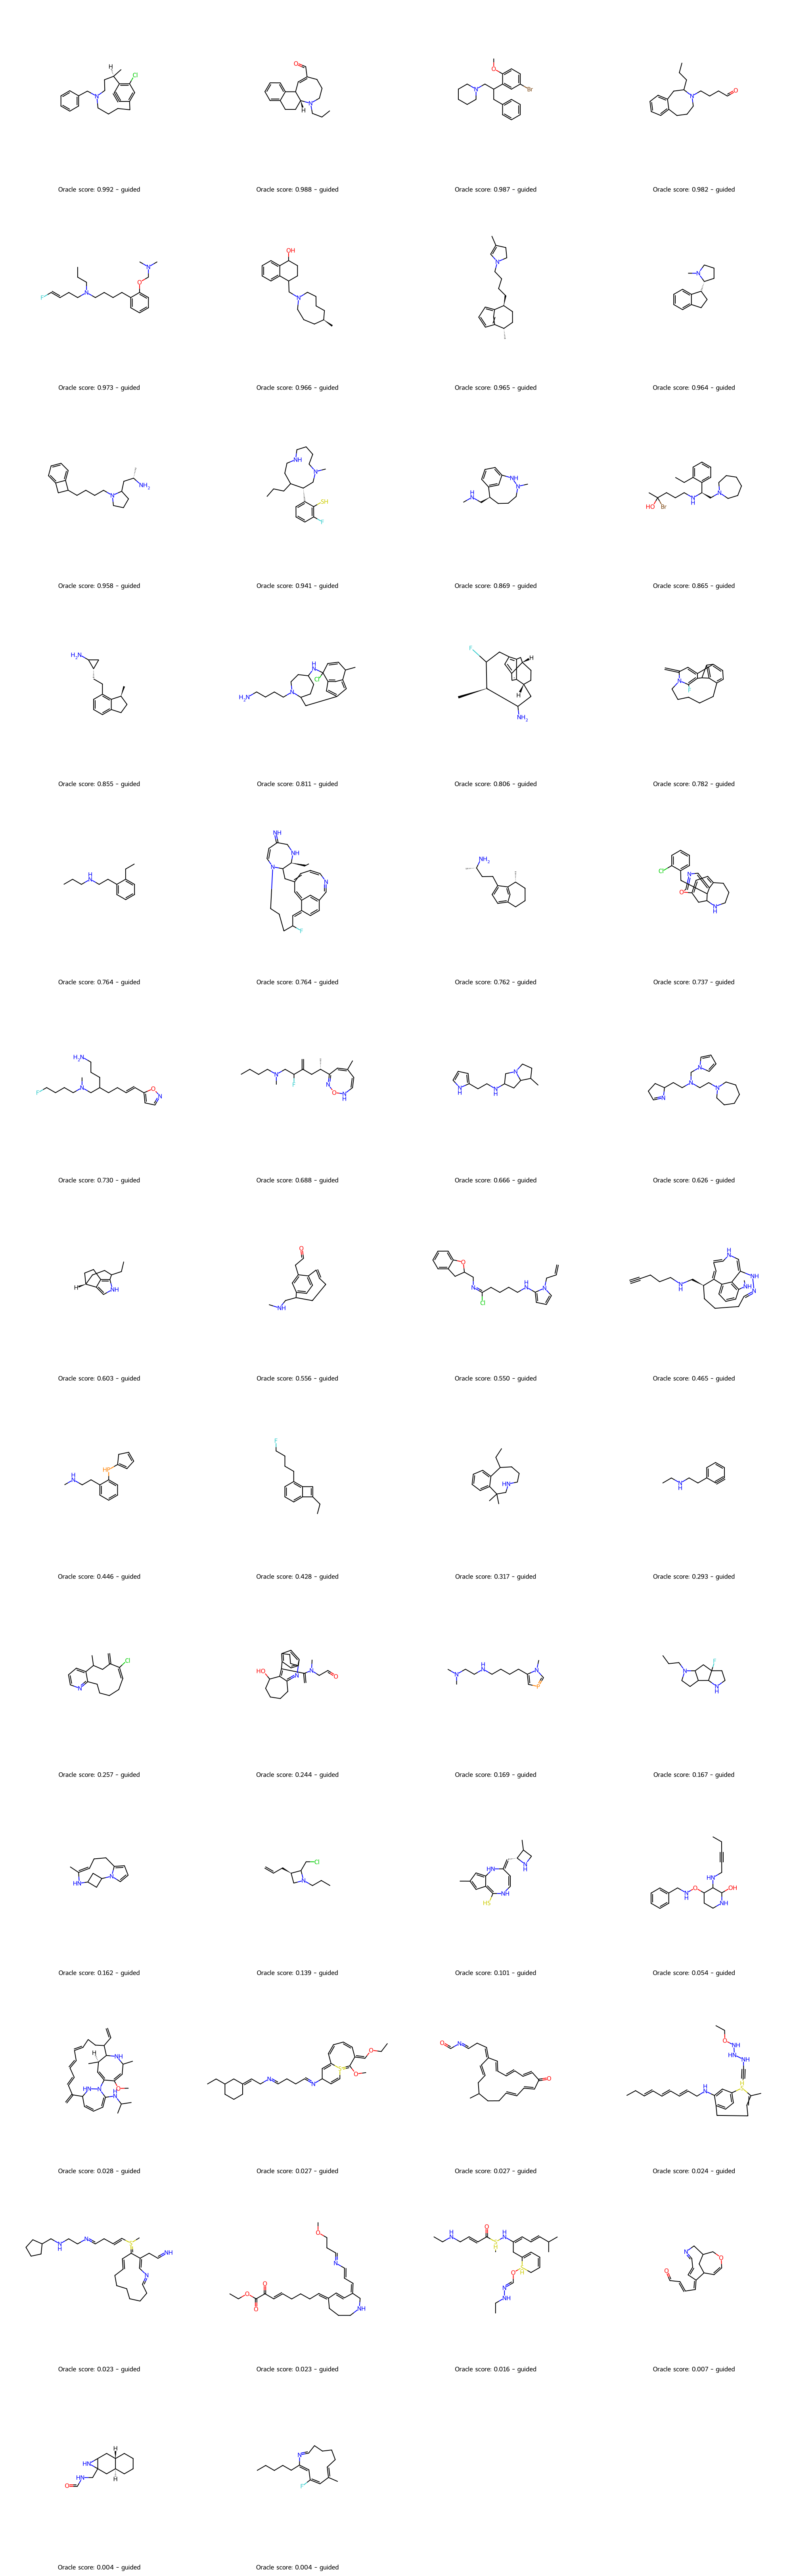

In [54]:
highest_scoring_molecules = []

for level in guidance_levels_to_plot:

    subset = data[data['guidance'] == level]
    subset = subset.sort_values(by='oracle_score', ascending=False)
    molecules = []
    labels =[]
    for smiles, score in zip(subset['canonical_smiles'], subset['oracle_score']):
        mol = Chem.MolFromSmiles(smiles)
        molecules.append(mol)
        guidance = "guided" if level > 0 else "unguided"
        labels.append(f"Oracle score: {score:.3f} - {guidance}")

    img = Draw.MolsToGridImage(molecules, molsPerRow=4, subImgSize=(500, 500), legends=labels)
    display(img)